<a href="https://colab.research.google.com/github/gonzalezzayra/EDP-I/blob/main/Polinomios_de_Legendre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Polinomios de Legendre**

Utilizando las librerías sympy y scipy de python, realizar lo siguiente:


a.   Graficar en un solo panel los polinomios de Legendre,

$$P_{n} (x) \text{ para } n =0,...,5$$

b. Mostrar graficamente que se satisface la relación (hágalo para n=3):

$$(1-x^2) P_{n}^{'}(x) = (n+1)xP_{n}(x) - (n+1)P_{n+1}(x)$$

c. Mostrar algebraicamente que se satisface la relación (hágalo para n=3):

$$(1-x^2) P_{n}^{'}(x) = (n+1)xP_{n}(x) - (n+1)P_{n+1}(x)$$

d. Mostrar algebraicamente que se satisface la relación (hágalo para n=3):

$$ (n+1)P_{n+1}(x) - (2n+1)xP_{n}(x) + nP_{n-1}(x)=0, \text{ } n =0,1,2,...$$

e. Muestre que se cumple la fórmula de Rodrigues, ejemplificando para $n = 0,1,...,5$

$$P_n(x) = \frac{1}{2^{n} n! } \frac{d^{n}}{ dx^{n}} (x^{2}-1)^n, \text{ } \text{n=0,1,2,...} $$








In [40]:
#Importar librerias

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy.special import legendre

#c en adelante con legendre(n,alpha)

In [41]:
x = sp.Symbol('x')
n = sp.Symbol('n', integer=True)

In [42]:
#valores es para dar 100 valores entre -1 y 1
valores = np.linspace(-1, 1, 100)



a.   Graficar en un solo panel los polinomios de Legendre,

$$P_{n} (x) \text{ para } n =0,...,5$$



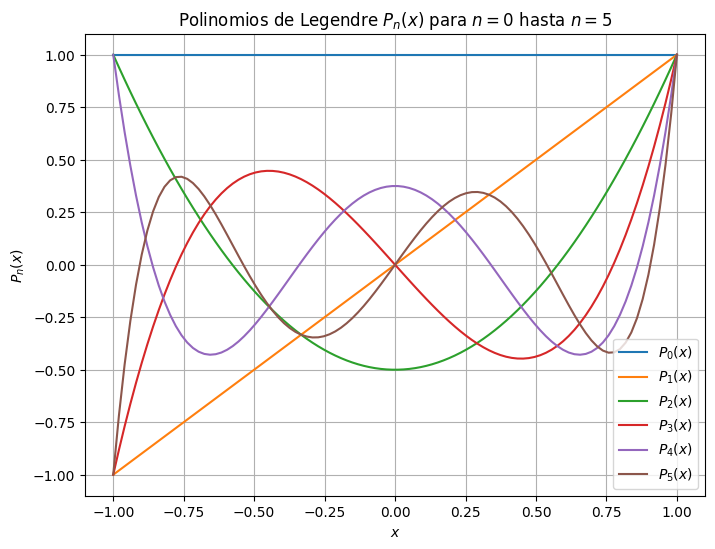

In [43]:
#Graficar polinomio de Legendre para cada n
plt.figure(figsize=(8, 6))
for i in range(6):
    Pn = legendre(i)
    plt.plot(valores, Pn(valores), label=f'$P_{i}(x)$')

plt.title('Polinomios de Legendre $P_n(x)$ para $n=0$ hasta $n=5$')
plt.xlabel('$x$')
plt.ylabel('$P_n(x)$')
plt.legend()
plt.grid(True)
plt.show()

b. Mostrar graficamente que se satisface la relación (hágalo para n=3):

$$(1-x^2) P_{n}^{'}(x) = (n+1)xP_{n}(x) - (n+1)P_{n+1}(x)$$

In [45]:
#Calculamos P_3(x) and P_4(x)
P3 = legendre(3)
P4 = legendre(4)


P3_valores = P3(valores)
P3_deriv = np.gradient(P3_valores, valores)

#Lado izquierdo
#(1 - x^2) * P_3'(x)
liz = (1 - valores**2) * P3_deriv

#Lado derecho
#4x P_3(x) - 4 P_4(x)
ld = 4 * valores * P3(valores) - 4 * P4(valores)

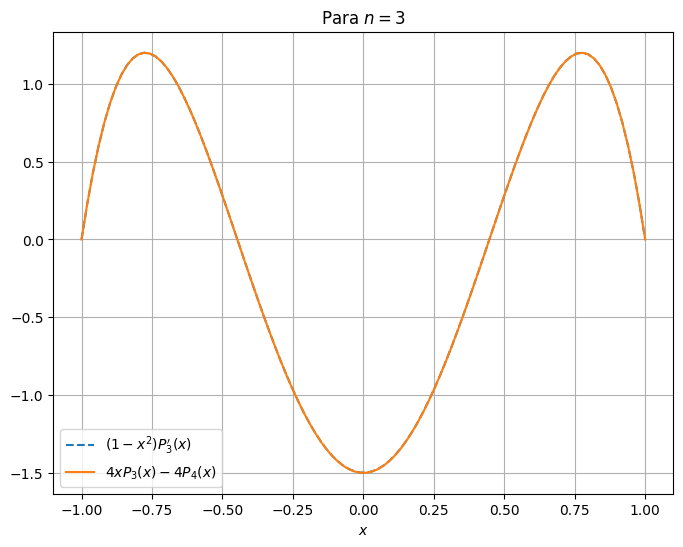

In [46]:
#Graficar para n=3
plt.figure(figsize=(8, 6))
plt.plot(valores, liz, label='$(1 - x^2) P_3\'(x)$', linestyle='--')
plt.plot(valores, ld, label='$4x P_3(x) - 4 P_4(x)$', linestyle='-')
plt.title('Para $n=3$')
plt.xlabel('$x$')
plt.legend()
plt.grid(True)
plt.show()

c. Mostrar algebraicamente que se satisface la relación (hágalo para n=3):

$$(1-x^2) P_{n}^{'}(x) = (n+1)xP_{n}(x) - (n+1)P_{n+1}(x)$$

In [47]:
#Con sympy
def polinomio_legendre(n, x):
    return sp.simplify(sp.functions.special.polynomials.legendre(n, x))

#Calcular P_3(x) and P_4(x)
P3_sym = polinomio_legendre(3, x)
P4_sym = polinomio_legendre(4, x)

#Calcular la derivada de P_3(x)
P3_deriv_sym = sp.diff(P3_sym, x)

#Lado izquierdo
#(1 - x^2) * P_3'(x)
liz_sym = (1 - x**2) * P3_deriv_sym

#Lado derecho
#4x P_3(x) - 4 P_4(x)
ld_sym = 4 * x * P3_sym - 4 * P4_sym


diff = sp.simplify(liz_sym - ld_sym)
print("El valor es de: ", diff)

El valor es de:  0


d. Mostrar algebraicamente que se satisface la relación (hágalo para n=3):

$$ (n+1)P_{n+1}(x) - (2n+1)xP_{n}(x) + nP_{n-1}(x)=0, \text{ } n =0,1,2,...$$

In [50]:
#Calcular P_2(x), P_3(x), and P_4(x)
P2_sym = polinomio_legendre(2, x)
P3_sym = polinomio_legendre(3, x)
P4_sym = polinomio_legendre(4, x)

#Para 4 P_4(x) - 7 x P_3(x) + 3 P_2(x)
expr = 4 * P4_sym - 7 * x * P3_sym + 3 * P2_sym

#Simplificar
resultado = sp.simplify(expr)
print( "El resultado es: ", resultado)

El resultado es:  0


e. Muestre que se cumple la fórmula de Rodrigues, ejemplificando para $n = 0,1,...,5$

$$P_n(x) = \frac{1}{2^{n} n! } \frac{d^{n}}{ dx^{n}} (x^{2}-1)^n, \text{ } \text{n=0,1,2,...} $$

In [49]:
for n in range(6):
    #Calcular (x^2 - 1)^n
    f = (x**2 - 1)**n

    #Calcular la derivada de orden n
    f_deriv = sp.diff(f, x, n)

    #Aplicamos la fórmula de Rodrigues
    Pn_rodrigues = (1 / (2**n * sp.factorial(n))) * f_deriv

    #Calcular P_n(x)
    Pn = sp.legendre(n, x)

    diff = sp.simplify(Pn_rodrigues - Pn)
    print(f"n = {n}, Diferencia (debería ser 0): {diff}")

n = 0, Diferencia (debería ser 0): 0
n = 1, Diferencia (debería ser 0): 0
n = 2, Diferencia (debería ser 0): 0
n = 3, Diferencia (debería ser 0): 0
n = 4, Diferencia (debería ser 0): 0
n = 5, Diferencia (debería ser 0): 0
